In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import flexiblecc as fcc
from flexiblecc.Metrics import voronoi

In [3]:
import numpy as np
import cv2

In [4]:
import matplotlib.pyplot as plt

# CV2 Using 14 parameters

In [12]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, obj_points, img_points = np.load("cal_out.npy", allow_pickle=True)

In [13]:
distCoeffs

array([[ 2.03288270e+00,  4.52548448e+01, -7.73226736e-03,
         1.80779861e-02, -1.47886929e+02,  2.09683329e+00,
         4.65342697e+01, -1.51419436e+02, -1.83082177e-02,
        -1.92297600e-03,  9.86103858e-03,  7.83822797e-03,
         6.18311558e-03,  3.67951499e-02]])

In [14]:
img_points_all = []
angels_all = []
diff_all = []
for i in range(len(img_points)):
    # Finder residualvektore
    repor_img_points, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    diff = img_points[i] - repor_img_points
    diff = diff.reshape(-1,2)
    
    # Finder vinklen mellem de projecteret pointer
    angels = np.array([np.angle(el[0] + el[1] * 1j, deg=True) for el in diff])
    neg_angels = np.where(angels < 0)[0]
    angels[neg_angels] = 360 + angels[neg_angels]
    
    # Ligger det hele ind i lister
    img_points_all.append(img_points[i])
    diff_all.append(diff)
    angels_all.append(angels)
    
diff_all = np.concatenate(diff_all).reshape(-1,2)
img_points_all = np.concatenate(img_points_all).reshape(-1,2)
angels_all = np.concatenate(angels_all).flatten()

## Angel

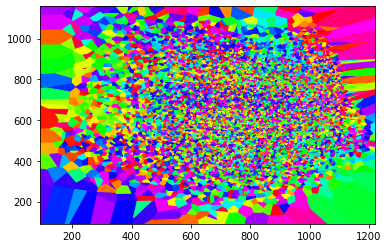

In [16]:
voronoi.plot_voronoi(img_points_all, angels_all)  # angels_all

## l2

In [21]:
ambi = np.linalg.norm(diff_all, axis=1)
ambi_norm = (ambi - ambi.min())/(ambi.max() - ambi.min())
ambi_360 = ambi_norm * 360

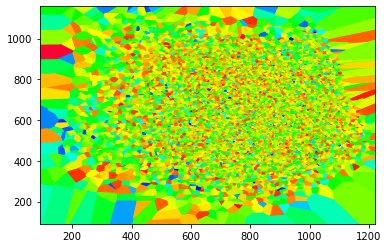

In [22]:
voronoi.plot_voronoi(img_points_all, ambi_360) 

# CV2 using 5 parameters

In [24]:
retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, obj_points, img_points = np.load("cal_out_low.npy", allow_pickle=True)

In [29]:
distCoeffs

array([[-6.81993229e-02, -1.02587054e+00,  1.08143750e-03,
        -3.12251987e-04,  6.95283127e+00]])

In [25]:
img_points_all = []
angels_all = []
diff_all = []
for i in range(len(img_points)):
    # Finder residualvektore
    repor_img_points, _ = cv2.projectPoints(obj_points[i], rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    diff = img_points[i] - repor_img_points
    diff = diff.reshape(-1,2)
    
    # Finder vinklen mellem de projecteret pointer
    angels = np.array([np.angle(el[0] + el[1] * 1j, deg=True) for el in diff])
    neg_angels = np.where(angels < 0)[0]
    angels[neg_angels] = 360 + angels[neg_angels]
    
    # Ligger det hele ind i lister
    img_points_all.append(img_points[i])
    diff_all.append(diff)
    angels_all.append(angels)
    
diff_all = np.concatenate(diff_all).reshape(-1,2)
img_points_all = np.concatenate(img_points_all).reshape(-1,2)
angels_all = np.concatenate(angels_all).flatten()

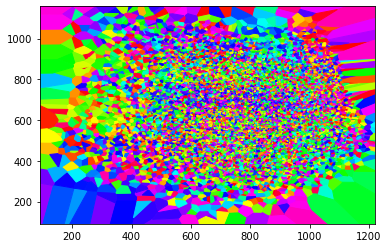

In [26]:
voronoi.plot_voronoi(img_points_all, angels_all)  # angels_all

In [27]:
ambi = np.linalg.norm(diff_all, axis=1)
ambi_norm = (ambi - ambi.min())/(ambi.max() - ambi.min())
ambi_360 = ambi_norm * 360

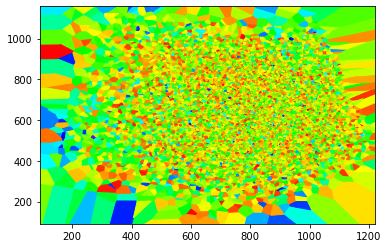

In [28]:
voronoi.plot_voronoi(img_points_all, ambi_360) 

# Central Model plots

In [19]:
%matplotlib qt

In [20]:
from flexiblecc.BundleAdjustment.central_model import CentralModel
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import uuid
from PIL import Image
import glob
import shutil

In [21]:
from flexiblecc.Metrics.centralmodel import make_cm_vec_plot, make_cm_vec_plot_gif

In [22]:
image_dimensions = (500,500)
grid_dimensions = (700,700)
control_points = np.abs(np.random.randn(10,10,3))*5
order = 3

cm = CentralModel(image_dimensions, grid_dimensions, control_points, order)

image_dimensions_step = 30
gif_file_out = "agif.gif"

In [23]:
make_cm_vec_plot(cm, image_dimensions_step)

In [26]:
make_cm_vec_plot_gif(cm, image_dimensions_step, gif_file_out, azim_start=0, azim_end=360, 
                     azim_step=5, elev_start=0, elev_end=90, elev_step=10, show=False)

# Stats thinks

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib qt

In [16]:
from flexiblecc.Metrics import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [14]:
arr = np.random.randint(0, 500, size=(100,4))

In [18]:
stats.plot_model_check(arr, violinplot=True)

In [29]:
mean, cov = stats.mean_cov(arr)

In [18]:
stats.plot_3DMVN(mean, cov, 0, 500, 1000)

In [16]:
stats.zero_mean_test(arr)

1.1102230246251565e-16

In [27]:
stats.arr_correlation_test(arr, nonparametric=False, plot=True, plot_critical_value=0.05)

({(0, 1): 0.41018380697053336,
  (0, 2): 0.5901750011880004,
  (0, 3): 0.09752579923695748,
  (1, 2): 0.3343070621484534,
  (1, 3): 0.9078031155108099,
  (2, 3): 0.9406358545922965},
 <matplotlib.axes._subplots.AxesSubplot at 0x1adbb84fe08>)

In [77]:
#spearmanr() # nonparametric
#pearsonr() # parametric: normally distributed




# ChArUco

In [1]:
%matplotlib qt
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import shutil
from tqdm import tqdm
from flexiblecc.Metrics import voronoi, distorsion
import flexiblecc
import random

In [5]:
squaresX = 28
squaresY = 19
squareLength = 0.01
markerLength = 0.0075 #Skal tjekkes
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)#Skal tjekkes (DICT_4X4_100)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

In [6]:
base_folder = r"CalImgs\ChArUco\S10PW\Fold_0"

test_img_files = base_folder+"/*.jpg"
files = glob.glob(test_img_files)
files = random.sample(files, 30)


test_imgs = [cv2.imread(f) for f in tqdm(files)]
test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in tqdm(test_imgs)]

#test_imgs_gray = [cv2.resize(img, None, fx=0.3, fy=0.3) for img in tqdm(test_imgs_gray)]
img_shape = test_imgs[0].shape[:2]

folder_out = base_folder+"/out"
os.makedirs(folder_out)

draw = False

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 240.69it/s]


In [18]:
test_imgs_gray[0].shape

(4032, 3024)

In [7]:
calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary)

In [7]:
np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])

In [25]:
calibrate_retval

0.8405466019811173

In [26]:
cameraMatrix

array([[963.95014692,   0.        , 483.3806189 ],
       [  0.        , 959.82590874, 567.61971334],
       [  0.        ,   0.        ,   1.        ]])

In [27]:
distCoeffs

array([[ 1.05544756e-02,  1.64142238e-01,  1.34831467e-02,
        -2.84215699e-03,  3.12468094e+00, -1.20710628e-01,
         7.97724919e-01,  2.29107616e+00,  4.28952216e-03,
        -7.63772845e-05, -1.34157637e-02,  5.49976001e-04,
        -5.58622215e-02, -3.68966097e-02]])

In [24]:
img_points_all, diff_all, angels_all, mag_all = voronoi.cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)

In [37]:
plt.figure()
voronoi.plot_voronoi(img_points_all, angels_all)
plt.show()

In [71]:
def undistort(points):
    return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)

In [72]:
flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20)

In [39]:
def Rt_from_rvec_tvec(rvec, tvec):
    R, _ = cv2.Rodrigues(rvec)

    Rt = np.zeros(shape=(4,4))
    Rt[:3, :3] = R
    Rt[:-1, 3] = tvec.flatten()
    Rt[-1,-1] = 1
    return Rt

def _do_homogeneous_Rt(p, Rt):
    if p.shape[0] == 3:
        temp = np.ones(4)
        temp[:3] = p
        p = temp
    assert p.shape[0] == 4, "The shape pf p has to be 3 or 4 for each point"

    new_p = np.matmul(Rt,p)
        
    new_p_uh = new_p[:3]
    new_p_uh = new_p_uh / new_p[-1]

    return new_p_uh

def do_homogeneous_Rt(p, Rt):
    if len(p.shape) == 1:
        new_ps = _do_homogeneous_Rt(p, Rt)
    else:
        new_ps = np.array([_do_homogeneous_Rt(p_el, Rt) for p_el in p])
    return new_ps

In [41]:
ps = board.chessboardCorners
npss = []

for idx in range(len(charucoCorners_all)):
    rvec, tvec = rvecs[idx], tvecs[idx]
    Rt = Rt_from_rvec_tvec(rvec, tvec)
    nps = do_homogeneous_Rt(ps, np.linalg.inv(Rt))
    npss.append(nps)
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
#ax.scatter(0,0,0)
for nps in npss:
    ax.scatter(nps[:,0],nps[:,1],nps[:,2])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
#ax.view_init(elev=90, azim=0)
plt.pause(0.001)

# Split images

In [1]:
import glob
import numpy as np
import os
import shutil

In [20]:
base_folder = r"S:\Programming\Studet\FCC\CalImgs\ChArUco\Samsung Galaxy S10 Plus\WideAngle"
files = glob.glob(os.path.join(base_folder, "*.JPG"))
np.random.shuffle(files)
n_folds = 6

In [21]:
folds = np.array_split(files, n_folds)

In [22]:
for i, fold in enumerate(folds):
    if i < n_folds-1:
        fold_folder = os.path.join(base_folder, "Fold_{}".format(i))
    else:
        fold_folder = os.path.join(base_folder, "Test".format(i))
        
    os.makedirs(fold_folder)
    
    for f in fold:
        shutil.move(f, os.path.join(fold_folder, os.path.basename(f)))

# Cal folders

In [6]:
import sys
sys.path.append("../")

In [7]:
import flexiblecc
import numpy
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil

In [8]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

In [10]:
folders = []
#folders = glob.glob(r"../CalImgs\ChArUco\InitTest/*")
#folders += [r"../CalImgs\ChArUco\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
#folders += glob.glob(r"../CalImgs\ChArUco\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
#folders += glob.glob(r"../CalImgs\ChArUco\NikonD3100\AF-S NIKKOR 55-300mm/*/*")
#folders += glob.glob(r"../CalImgs\ChArUco\Samsung Galaxy S10 Plus/*/*")

folders += glob.glob(r"../CalImgs\ChArUco\Samsung Galaxy S10 Plus\WideAngle\Fold_1")
print(folders)

['../CalImgs\\ChArUco\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_1']


In [4]:
for folder in tqdm(folders):
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    test_img_files = folder+"/*.jpg"
    files = glob.glob(test_img_files)
    
    base_files = [os.path.basename(f) for f in files]
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs]
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
    armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary, draw="TestOut")
    np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])
    
    img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
    plt.figure()
    flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
    plt.savefig(os.path.join(folder_out, "voronoi.svg"))
    plt.close()
    
    def undistort(points):
        return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)
    flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20,save_f_string=os.path.join(folder_out, "{}.svg"))
    
    plt.figure()
    for i, coners in enumerate(charucoCorners_all):
        plt.scatter(coners[:,0,0], coners[:,0,1], s=1)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.savefig(os.path.join(folder_out, "cover.svg"))
    plt.close()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:59<00:00, 59.76s/it]


In [29]:
folder

'CalImgs\\ChArUco\\InitTest\\Test2'

In [5]:
coners.shape

(486, 1, 2)

In [16]:
img_shape

(4032, 3024)

# Sort files

In [1]:
%matplotlib qt

In [2]:
import sys
sys.path.append("../")

In [3]:
import flexiblecc
import numpy
from tqdm import tqdm
import cv2
import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil

In [31]:
import click

In [9]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

board = cv2.aruco.CharucoBoard_create(squaresX, squaresY, squareLength, markerLength, dictionary)

In [44]:
#folders = []
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus/*/*")
#folders = glob.glob(r"../CalImgs\ChArUco - Sorted\InitTest/*")
#folders += [r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
#folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 55-300mm/*/*")

folders = glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle/*")

print(folders)

['../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Test']


In [45]:
plt.figure(figsize=(10,10))
plt.pause(0.01)
for folder in tqdm(folders):
    c_folder = os.path.join(folder, "quarantined")
    if os.path.exists(c_folder):
        continue
    
    print(folder)
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    test_img_files = folder+"/*.jpg"
    files = glob.glob(test_img_files)
    
    base_files = [os.path.basename(f) for f in files]
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs]
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    markerCorners_all, markerIds_all, charucoCorners_all, charucoIds_all, obj_points_all = flexiblecc.OldSchoolCC.find_Charuco(test_imgs_gray, dictionary, board)
    
    keep_list = []
    remove_list = []
    for i, (img, f, coners) in enumerate(zip(test_imgs, files, charucoCorners_all)):
        coners = coners.reshape(-1,2)
        plt.cla()
        plt.suptitle(f"{os.path.basename(folder)}: {i+1}/{len(files)}")
        plt.subplot2grid((2,2),(0,0))
        plt.scatter(coners[:,0], coners[:,1], s=5, c="red")
        xleft, xright = plt.xlim()
        yleft, yright = plt.ylim()
        
        plt.imshow(img)
        
        plt.xlim(xleft, xright)
        plt.ylim(yleft, yright)
        
        plt.subplot2grid((2,2),(0,1))
        plt.scatter(coners[:,0], coners[:,1], s=1, c="red")
        
        plt.subplot2grid((2,2),(1,1))
        plt.plot(coners[:,0], coners[:,1])
        
        plt.subplot2grid((2,2),(1,0))
        plt.plot(coners[:,0], coners[:,1], "-o")
        
        plt.pause(0.3)
        
        event = click.prompt("keep [k] or remove [r]? (d: k)", type=str, default="k")

        if event == "k":
            keep_list.append(f)
        elif event == "r":
            remove_list.append(f)
        else:
            break
    
    os.makedirs(c_folder)

    for f in remove_list:
        shutil.move(f, c_folder)

    np.save(os.path.join(c_folder,"quarantined.npy"),remove_list)
    np.save(os.path.join(c_folder,"keep.npy"),keep_list)
plt.close()

  0%|                                                                                                                                                                                                                                             | 0/6 [00:00<?, ?it/s]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_0
keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 17%|██████████████████████████████████████                                                                                                                                                                                              | 1/6 [01:46<08:50, 106.05s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_1
keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

 33%|████████████████████████████████████████████████████████████████████████████▎                                                                                                                                                        | 2/6 [03:03<06:29, 97.44s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_2
keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 50%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                                                                                  | 3/6 [04:30<04:43, 94.40s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_3
keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                                                            | 4/6 [05:46<02:57, 88.89s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_4
keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 83%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                                      | 5/6 [07:26<01:32, 92.10s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Test
keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

 r


keep [k] or remove [r]? (d: k) [k]: 

keep [k] or remove [r]? (d: k) [k]: 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [08:40<00:00, 86.81s/it]


In [50]:
folders = []

folders += glob.glob(r"../CalImgs\ChArUco - Sorted\InitTest/*")
folders += [r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\18mm"]
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 18-55mm\22mm/*")
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\NikonD3100\AF-S NIKKOR 55-300mm/*/*")
folders += glob.glob(r"../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus/*/*")
print(folders)

['../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\Telephoto\\Test', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_0', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_1', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_2', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_3', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Fold_4', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\UltraWide\\Test', '../CalImgs\\ChArUco - Sorted\\Samsung Galaxy S10 Plus\\WideAngle\\Fold_0', '../CalImgs\\Ch

In [51]:
for folder in tqdm(folders):
    print(folder)
    c_folder = os.path.join(folder, "quarantined")
    if not os.path.exists(c_folder):
        continue
        
    folder_out = folder+"/out"
    if os.path.exists(folder_out):
        shutil.rmtree(folder_out)
    os.makedirs(folder_out)
    
    test_img_files = folder+"/*.jpg"
    files = glob.glob(test_img_files)
    
    base_files = [os.path.basename(f) for f in files]
    np.save(os.path.join(folder_out, "image_order.npy"), base_files)

    test_imgs = [cv2.imread(f) for f in files]
    test_imgs_gray = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in test_imgs]
    test_imgs_shape = [img.shape[:2] for img in test_imgs_gray]
    
    for i, (img_gray, color_img, img_shape) in enumerate(zip(test_imgs_gray, test_imgs, test_imgs_shape)):
        h_img, w_img = img_shape
        w = max(h_img, w_img)
        h = min(h_img, w_img)
        
        if h_img != h:
            raise RuntimeError(files[i])

    calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
    armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(test_imgs_gray, squaresX, squaresY, squareLength, markerLength, dictionary, draw="TestOut")
    np.save(os.path.join(folder_out, "cali.npy"), [calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, armarkerIds_all, obj_points_all])
    print(calibrate_retval)
    img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
    plt.figure()
    flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
    plt.savefig(os.path.join(folder_out, "voronoi.svg"))
    plt.close()
    
    def undistort(points):
        return cv2.undistortPoints(points, cameraMatrix, distCoeffs, P=cameraMatrix).reshape(-1, 2)
    flexiblecc.Metrics.plot_distort(undistort, test_imgs[0].shape[:2], contour_n_levels=20,save_f_string=os.path.join(folder_out, "{}.svg"))
    
    plt.figure()
    for i, coners in enumerate(charucoCorners_all):
        plt.scatter(coners[:,0,0], coners[:,0,1], s=1)
    plt.xlim(0, w)
    plt.ylim(0, h)
    plt.savefig(os.path.join(folder_out, "cover.svg"))
    plt.close()

  0%|                                                                                                                                                                                                                                            | 0/18 [00:00<?, ?it/s]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_0
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_1
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_2
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_3
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Fold_4
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\Telephoto\Test
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_0
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_1
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_2
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_3
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Fold_4
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\UltraWide\Test
../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_0
2.7648609781498235


 72%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▉                                                               | 13/18 [00:48<00:18,  3.76s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_1
2.4864259619888847


 78%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                  | 14/18 [01:36<01:08, 17.05s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_2
2.687363318230465


 83%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏                                     | 15/18 [02:28<01:22, 27.40s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_3
2.5240474932803107


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                         | 16/18 [03:19<01:09, 34.57s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_4
2.5134862711637336


 94%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▍            | 17/18 [04:12<00:40, 40.11s/it]

../CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Test
2.898475743891131


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18/18 [05:03<00:00, 16.86s/it]


# Voronoi

In [14]:
import sys
sys.path.append("../")

import glob
import flexiblecc
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [15]:
folder = r"S:\Programming\Studet\FCC\CalImgs\ChArUco - Sorted\Samsung Galaxy S10 Plus\WideAngle\Fold_1/*.jpg"
files = glob.glob(folder)
gray_imgs = [cv2.cvtColor(cv2.imread(f), cv2.COLOR_BGR2GRAY) for f in files]

In [16]:
squaresX = 28 # [#]
squaresY = 19 # [#]
squareLength = 0.01 # [m]
markerLength = 0.0075 # [m]
squareMarkerLengthRate = squareLength/markerLength
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000)

zero_zone=(-1, -1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
win_size=(10, 10)

## 5 distCoeffs

In [31]:
calibrate_retval, cameraMatrix, distCoeffs, rvecs, tvecs, stdDeviationsIntrinsics, stdDeviationsExtrinsics, perViewErrors, charucoCorners_all, charucoIds_all, markerCorners_all, \
    armarkerIds_all, obj_points_all, board = flexiblecc.OldSchoolCC.calibrate_camera_charuco(gray_imgs, squaresX, squaresY, squareLength, markerLength, dictionary, flags=0)

In [32]:
distCoeffs

array([[ 1.58020407e-01, -7.88331892e-01,  1.71151433e-03,
        -2.49698766e-04,  1.08131939e+00]])

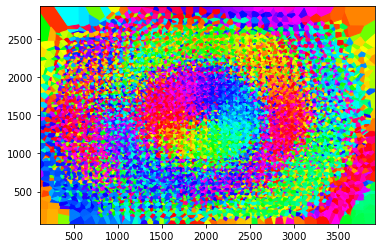

In [33]:
img_points_all, diff_all, angels_all, mag_all = flexiblecc.Metrics.voronoi.projectPoints_and_cal_angles_and_mag(charucoCorners_all, obj_points_all, rvecs, tvecs, cameraMatrix, distCoeffs)
    
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all)
plt.show()

## 14 distCoeffs

In [20]:
calibrate_retval_14, cameraMatrix_14, distCoeffs_14, rvecs_14, tvecs_14, stdDeviationsIntrinsics_14, stdDeviationsExtrinsics_14, perViewErrors_14, charucoCorners_all_14, charucoIds_all_14, markerCorners_all_14, \
    armarkerIds_all_14, obj_points_all_14, board_14 = flexiblecc.OldSchoolCC.calibrate_camera_charuco(gray_imgs, squaresX, squaresY, squareLength, markerLength, dictionary)

In [21]:
distCoeffs_14

array([[ 4.97642627e-01,  1.68110611e+00, -1.44136434e-02,
        -2.61642346e-02,  8.30654033e+00,  2.81952162e-01,
         2.76156131e+00,  6.65554703e+00,  2.75438270e-02,
        -4.65611685e-03,  1.64618900e-02,  8.02726746e-04,
         2.06355869e-02, -4.63539968e-02]])

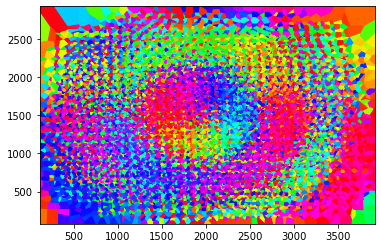

In [22]:
img_points_all_14, diff_all_14, angels_all_14, mag_all_14 = flexiblecc.Metrics.voronoi.projectPoints_and_cal_angles_and_mag(charucoCorners_all_14, obj_points_all_14, rvecs_14, tvecs_14, cameraMatrix_14, distCoeffs_14)
    
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, angels_all_14)
plt.show()

# Ny methode

In [1]:
import sys
sys.path.append("../")

import glob
import flexiblecc
import numpy as np
import cv2
import random
import matplotlib.pyplot as plt

In [23]:
file = r"C:\Users\SimonLBS\Downloads\residuals_and_points_2D_2020-05-09_22-32-50.npy"

In [24]:
ar = np.load(file, allow_pickle=True)

In [25]:
_, project_points, image_points = ar

In [26]:
image_points = np.concatenate(image_points)
project_points = np.concatenate(project_points)

In [27]:
imp, diff, angels, mag = flexiblecc.Metrics.voronoi.cal_angles_and_mag(image_points, project_points)

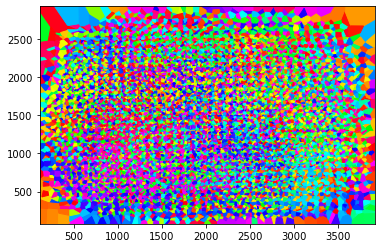

In [28]:
plt.figure()
flexiblecc.Metrics.voronoi.plot_voronoi(imp, angels)
plt.show()

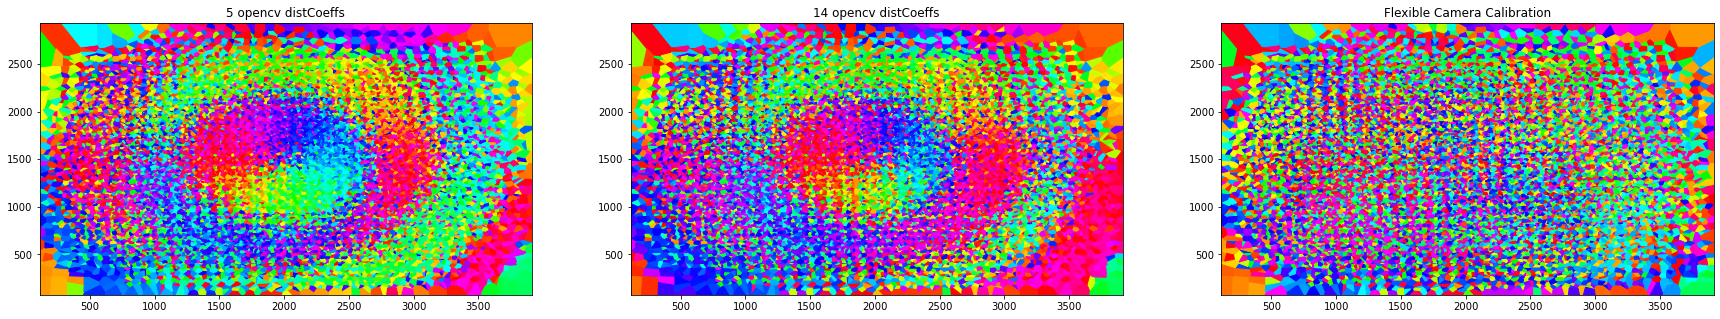

In [39]:
plt.figure(figsize=(30,5))
ax = plt.subplot(131)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all, angels_all, ax=ax)
plt.title("5 opencv distCoeffs")
ax = plt.subplot(132)
flexiblecc.Metrics.voronoi.plot_voronoi(img_points_all_14, angels_all_14, ax=ax)
plt.title("14 opencv distCoeffs")
ax = plt.subplot(133)
flexiblecc.Metrics.voronoi.plot_voronoi(imp, angels, ax=ax)
plt.title("Flexible Camera Calibration")
plt.show()